# Component 1: EDA, App Categorization and Features

This notebook contains 1. EDA (Exploratory Data Analysis), 2. Text Preprocessing and Feature Engineering and 3. Categorization.

In [71]:
# Standard Libraries
import re
import warnings

# Data Manipulation & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sentence_transformers import SentenceTransformer

# Machine Learning & Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, silhouette_score
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import hdbscan

# Imbalanced Learning
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# NLTK Resources (if needed)
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [72]:
# Load the cleaned dataset 
file_path = 'language_apps_MANUAL_CATEGORY_UPDATE.csv' 
df = pd.read_csv(file_path)

## 1. EDA (Exploratory Data Analysis)

In [73]:
print(df.columns)
df.head()

Index(['title', 'description', 'category', 'descriptionHTML', 'summary',
       'installs', 'minInstalls', 'realInstalls', 'score', 'ratings',
       'reviews', 'histogram', 'price', 'free', 'currency', 'sale', 'saleTime',
       'originalPrice', 'saleText', 'offersIAP', 'inAppProductPrice',
       'developer', 'developerId', 'developerEmail', 'developerWebsite',
       'developerAddress', 'privacyPolicy', 'genre', 'genreId', 'categories',
       'icon', 'headerImage', 'screenshots', 'video', 'videoImage',
       'contentRating', 'contentRatingDescription', 'adSupported',
       'containsAds', 'released', 'lastUpdatedOn', 'updated', 'version',
       'comments', 'appId', 'url', 'category.1'],
      dtype='object')


,title,description,category,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,...,adSupported,containsAds,released,lastUpdatedOn,updated,version,comments,appId,url,category.1
0,Duolingo: Language Lessons,Learn a new language with the world‚Äôs most-d...,Fun & Specialized Learning,Learn a new language with the world‚Äôs most-d...,"Learn Spanish, French, German, English, Math, ...","500,000,000+",500000000,798147205,4.567638,40018826.0,...,True,True,29-May-13,1-Dec-25,1.764635e+09,Varies with device,[],com.duolingo,https://play.google.com/store/apps/details?id=...,LANGUAGE_LEARNING
1,Busuu: Learn & Speak Languages,Learn Spanish with language learning designed ...,Conversation & Fluency,Learn Spanish with language learning designed ...,"Learn Languages Fast - Learn Spanish, Japanese...","50,000,000+",50000000,52244753,4.659640,1054466.0,...,True,True,29-Jul-11,20-Nov-25,1.763658e+09,32.26.0(1499641),[],com.busuu.android.enc,https://play.google.com/store/apps/details?id=...,LANGUAGE_LEARNING
2,Speak: Language Learning,Get ready to take your language skills to the ...,Conversation & Fluency,Get ready to take your language skills to the ...,"Reach fluency in Spanish, French, English, and...","5,000,000+",5000000,8902185,4.668526,98601.0,...,False,False,10-Mar-19,26-Nov-25,1.764181e+09,4.24.0,[],com.selabs.speak,https://play.google.com/store/apps/details?id=...,LANGUAGE_LEARNING
3,Lingo Legend Language Learning,Learn a language while playing language learni...,LANGUAGE_LEARNING,Learn a language while playing language learni...,"Learn a language playing a game! Spanish, Fren...","100,000+",100000,345318,4.757576,8450.0,...,True,True,28-Nov-22,26-Nov-25,1.764185e+09,114,[],com.hyperthought.lingolegend,https://play.google.com/store/apps/details?id=...,LANGUAGE_LEARNING
4,Falou - Fast language learning,Want to learn a language really fast? Don't ha...,LANGUAGE_LEARNING,Want to learn a language really fast? Don&#39;...,Want to learn English? Learn French or learn S...,"10,000,000+",10000000,12150516,4.726343,836163.0,...,False,False,9-Jul-21,20-Nov-25,1.763646e+09,0.0.93,[],com.moymer.falou,https://play.google.com/store/apps/details?id=...,LANGUAGE_LEARNING


In [74]:
df.describe()

,minInstalls,realInstalls,score,ratings,reviews,price,saleTime,originalPrice,saleText,developerAddress,updated
count,5.210000e+02,5.210000e+02,502.000000,5.020000e+02,502.000000,521.000000,0.0,0.0,0.0,0.0,4.790000e+02
mean,2.587124e+07,4.011756e+07,4.159007,3.513863e+05,6920.523904,0.114031,NaN,NaN,NaN,NaN,1.756024e+09
std,2.401309e+08,3.054997e+08,1.099718,2.616541e+06,46344.093985,1.131954,NaN,NaN,NaN,NaN,1.758216e+07
min,5.000000e+00,5.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,1.622713e+09
25%,5.000000e+04,7.912000e+04,4.218561,9.440000e+02,25.000000,0.000000,NaN,NaN,NaN,NaN,1.757066e+09
50%,5.000000e+05,7.162060e+05,4.500000,8.960000e+03,175.500000,0.000000,NaN,NaN,NaN,NaN,1.762523e+09
75%,1.000000e+06,4.063880e+06,4.656330,5.445650e+04,1240.500000,0.000000,NaN,NaN,NaN,NaN,1.764059e+09
max,5.000000e+09,5.075282e+09,5.000000,4.001883e+07,918336.000000,19.990000,NaN,NaN,NaN,NaN,1.764681e+09


In [75]:
df.isna().sum()

title                         0
description                   0
category                      0
descriptionHTML               0
summary                       0
installs                      0
minInstalls                   0
realInstalls                  0
score                        19
ratings                      19
reviews                      19
histogram                     0
price                         0
free                          0
currency                      0
sale                          0
saleTime                    521
originalPrice               521
saleText                    521
offersIAP                     0
inAppProductPrice            90
developer                     0
developerId                   0
developerEmail                0
developerWebsite             32
developerAddress            521
privacyPolicy                 0
genre                         0
genreId                       0
categories                    0
icon                          0
headerIm

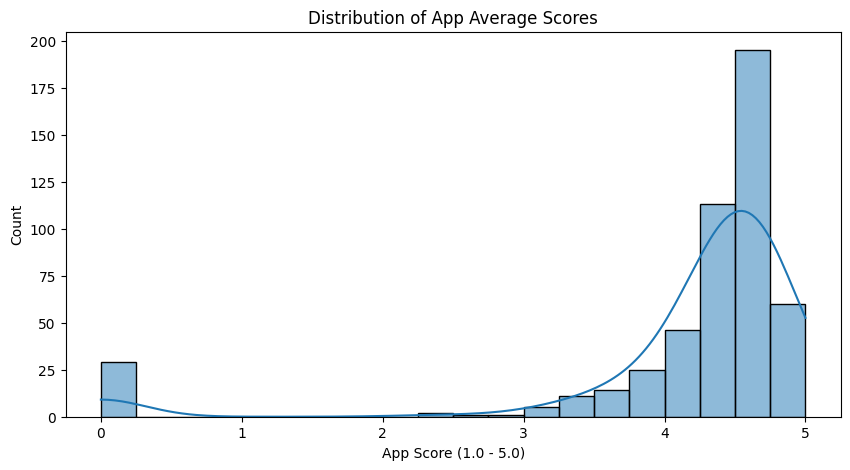

In [76]:
# Distribution of App Scores
plt.figure(figsize=(10, 5))
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Distribution of App Average Scores')
plt.xlabel('App Score (1.0 - 5.0)')
plt.show()

The vast majority of apps cluster tightly in the 4.5 to 5.0 range.  
Bimodal Distribution (The "Filter" Cluster): There is a secondary cluster near the 0.0 mark. These are typically apps that:
- Have very few ratings (e.g., one or two bad reviews), including apps that are newly released and haven't gained traction yet
- Are low-effort apps that survived the initial keyword scrape

In [77]:
df['adSupported'].value_counts()

adSupported
False    345
True     176
Name: count, dtype: int64

In [78]:
df['containsAds'].value_counts()

containsAds
False    345
True     176
Name: count, dtype: int64

In [79]:
df['price'].value_counts()

price
0.00     512
2.99       2
7.99       2
4.99       1
1.49       1
0.99       1
9.99       1
19.99      1
Name: count, dtype: int64

In [80]:
df['inAppProductPrice'].value_counts()

inAppProductPrice
$0.99 - $259.00 per item    13
$4.99 - $191.99 per item    11
$0.99 - $39.99 per item     10
$11.99 - $39.99 per item     9
$0.49 - $43.99 per item      8
                            ..
$3.00 - $129.99 per item     1
$9.99 - $99.99 per item      1
$9.49 per item               1
$8.99 - $224.99 per item     1
$1.99 - $99.99 per item      1
Name: count, Length: 278, dtype: int64

Most apps are free. This column is not likely to be useful for the later prediction processes.

In [81]:
# Unique counts of features
print(df[['currency', 'developer', 'genre']].nunique())
df['developer'].value_counts().head(15)

currency       1
developer    371
genre         18
dtype: int64


developer
FunEasyLearn               22
Mondly by Pearson          12
Ling Learn Languages       12
Drops Languages             9
MosaLingua (digiSchool)     9
POAS Apps                   8
BNR Languages Inc.          8
Wlingua                     6
Google LLC                  6
Langster Languages          6
Magoosh                     5
Studycat Limited            5
Dominik Gyecsek             5
LuvLingua                   5
Appcano LLC                 4
Name: count, dtype: int64

There are too many develers with only a few apps, but there also big ones. For the popularity prediction, I'll use the developers as a categorical variable (whether an app is developerd by a bid developer or not).

In [82]:
print(df['genre'].unique())

['Education' 'Educational' 'Puzzle' 'Books & Reference' 'Music'
 'Travel & Local' 'Productivity' 'Tools' 'Social' 'Music & Audio'
 'Entertainment' 'Health & Fitness' 'Communication' 'Finance' 'Casual'
 'Art & Design' 'Business' 'Medical']


The 'genres' column offers unique metadata, but it is often sparse and arbitrarily chosen by the developer for App Store Optimization (ASO) based on [this](https://support.google.com/googleplay/android-developer/answer/9859673?hl=en) page. Therefore, it's not a reliable feature for *clustering* methodology. 

For the initial clustering process, I exclude genres so that the categories are determined purely by the content and learning style described in the app descriptions. After clustering, I examine the distribution of genres within each cluster as a validation step. 

In [83]:
df['category'].value_counts()

category
LANGUAGE_LEARNING              354
DICTIONARY&TRANSLATION          54
LLM                             46
NOTEBOOK                        24
Fun & Specialized Learning      11
Comprehensive Skill Builder     10
Conversation & Fluency           9
Vocabulary & Flashcard           8
Language Exchange                3
conversation & Fluency           1
c                                1
Name: count, dtype: int64

In [84]:
df['genre'].value_counts()

genre
Education            371
Productivity          57
Books & Reference     29
Educational           16
Tools                 15
Entertainment          9
Travel & Local         6
Social                 6
Communication          3
Finance                1
Business               1
Art & Design           1
Casual                 1
Music & Audio          1
Health & Fitness       1
Music                  1
Puzzle                 1
Medical                1
Name: count, dtype: int64

## 2. Text Preprocessing and Feature Engineering

### 2.1 Text Cleaning and Domain Stop Word Filtering

I combine the descriptive fields (title, description) and apply aggressive filtering to remove low-signal marketing noise.

In [85]:
# Clean up the install number (removes ',', '+', and converts to numeric)
def clean_installs(installs_str):
    if isinstance(installs_str, str):
        return int(re.sub(r'[+,]', '', installs_str))
    return installs_str

df['realInstalls'] = df['realInstalls'].apply(clean_installs)

In [86]:
# Combine all relevant text fields into a single column
# Focusing on 'title' and 'description' as 'summary' often introduces redundancy.
df['full_text'] = df['title'].astype(str) + ' ' + df['description'].astype(str)

# --- Text Preprocessing Pipeline ---
stop_words = set(stopwords.words('english'))
stop_words.update(['app', 'application', 'learn', 'learning', 'language', 'new', 'free', 'best', 'use', 'get', 'like', 'every',
                    'year', 'character', 'spell', 'word', 'words', 'student', 'students', 'course', 'courses', 'study', 'studying', 'educational',
                    'bilingual','really', 'good', 'well', 'many',
                    # Specific language names to exclude (to force methodology grouping):
                    'english', 'korean', 'japanese', 'mandarin', 'chinese', 'arabic', 'spanish',
                    'french', 'german', 'russian', 'portuguese', 'italian', 'vietnamese',
                    'polish', 'greek', 'turkish', 'dutch', 'swedish', 'hebrew', 'norwegian', 'brazilian', 
                    #exclude hsk, kanji
                    # Final cleanup of highly frequent, low-value methodology/goal words:
                    'practice', 'activity', 'exercise', 'session', 'result', 'progress', 'skill', 'level', 
                    'fluent', 'fluency', 'help', 'make', 'want'
                   ]) # add domain-specific stop words
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stop words
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply preprocessing
df['cleaned_text'] = df['full_text'].apply(preprocess_text)

# Display a sample of the cleaned text
print("--- Sample Cleaned Text ---")
for i in range(3):
    print(f"App {i}: {df['cleaned_text'].iloc[i][:150]}...")
    
# Save the feature for later modeling
TEXT_CORPUS = df['cleaned_text'].tolist()

--- Sample Cleaned Text ---
App 0: duolingo lesson world mostdownloaded education duolingo fun language quick bitesized lesson speaking reading listening writing build vocabulary gramma...
App 1: busuu speak language designed build confidence day one connect online community feedback exercise vocabulary speaker easily see need revision verb pro...
App 2: speak ready take skill next speak ultimate focusing improving speaking ability powered cuttingedge ai technology speak ensures gain engaging reallife ...


### 2.2. Feature Engineering

In [87]:
# --- Define Features and Target (Recreating necessary flags) ---
# Target variable: 1 if high score (>=4.0) AND high installs (>=500k)
df['is_high_popularity'] = ((df['score'] >= 4.0) & (df['realInstalls'] >= 500_000)).astype(int)

# Boolean features
developers = df.groupby('developer').size().sort_values(ascending=False).head(10)
developers = developers[developers >= 5].index.to_list()
df['is_developer'] = df['developer'].apply(lambda x: 1 if x in developers else 0)
df['has_ads'] = df['adSupported'] | df['containsAds']
df['is_paid'] = df['price'] > 0 

# Final check
print(df['is_high_popularity'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
print(df['is_developer'].value_counts())
print(df['is_paid'].value_counts())
print(df['has_ads'].value_counts())

# --- IAP Price Ceiling Feature Engineering (NEW CRITICAL FEATURE) ---
def extract_iap_metrics(price_string):
    """Extracts the highest and lowest dollar amount from the inAppProductPrice string."""
    if pd.isna(price_string) or price_string == '0':
        return 0.0, 0.0
    
    # Use regex to find all numbers (including decimals)
    prices = re.findall(r'\$([\d,]+\.?\d*)', price_string)
    
    if prices:
        # Clean up commas and convert to float
        prices = [float(p.replace(',', '')) for p in prices]
        return min(prices), max(prices)
    return 0.0, 0.0

# Apply the extraction function, returning two new columns
df[['min_iap_price', 'max_iap_price']] = df['inAppProductPrice'].apply(
    lambda x: pd.Series(extract_iap_metrics(x))
)

print(f"Engineered IAP price features. Min price found: {df['min_iap_price'].min():.2f}, Max price found: {df['max_iap_price'].max():.2f}")


is_high_popularity
0    50.5%
1    49.5%
Name: proportion, dtype: object
is_developer
0    423
1     98
Name: count, dtype: int64
is_paid
False    512
True       9
Name: count, dtype: int64
has_ads
False    345
True     176
Name: count, dtype: int64
Engineered IAP price features. Min price found: 0.00, Max price found: 999.99


#### 2.3 Full Text
The core of our recommender system relies on extracting "categories" from the app's textual content. We combine the most descriptive fields (title, description) into one feature, then clean it for modeling.

In [88]:
df['full_text'] = df['title'].astype(str) + ' ' + df['description'].astype(str)
print(df['full_text'].values[0][:200])  # Display a sample full_text

Duolingo: Language Lessons Learn a new language with the world‚Äôs most-downloaded education app! Duolingo is the fun, free app for learning 40+ languages through quick, bite-sized lessons. Practice s


#### 2.4 Language Support (The Secondary Filter)

I will extract the specific languages taught, turning them into a primary filtering feature for the recommender for the later recommender building and for for possible filtering on Finny.

In [89]:
# List of common languages searched and found in the dataset
COMMON_LANGUAGES = [
    'spanish', 'french', 'german', 'japanese', 'korean', 'chinese', 
    'italian', 'russian', 'portuguese', 'arabic', 'english'
]

# Create a set of offered languages for each app based on description/title
def extract_languages(text, language_list):
    text = str(text).lower()
    found_languages = [lang for lang in language_list if lang in text.lower()]
    return ','.join(found_languages) if found_languages else 'none'

df['languages_offered'] = df['full_text'].apply(lambda x: extract_languages(x, COMMON_LANGUAGES))

print("\nSample Language Extraction:")
print(df[['title', 'languages_offered']].head(5).to_markdown(index=False))



Sample Language Extraction:
| title                          | languages_offered                                                                       |
|:-------------------------------|:----------------------------------------------------------------------------------------|
| Duolingo: Language Lessons     | spanish,french,german,japanese,korean,chinese,italian,russian,portuguese,arabic,english |
| Busuu: Learn & Speak Languages | spanish,french,german,japanese,korean,chinese,italian,russian,portuguese,arabic,english |
| Speak: Language Learning       | spanish,french,japanese,korean,italian,english                                          |
| Lingo Legend Language Learning | spanish,french,german,japanese,korean,chinese,italian,russian,portuguese                |
| Falou - Fast language learning | spanish,french,german,japanese,korean,chinese,italian,russian,portuguese,english        |


#### 2.5 Category Assignment
For the later supervised classification process, I needed to assing categories to some of the apps. I manually assigned categories to a small number of apps, including ones I knew and ones I searched, beforehand. 
Additionally,
1. Exam Preparation apps: if an app title includes names of exams, such as "TOEFL", an app is most likely designed for the exam preparation.
2. Some of the apps that includes "Language Exchange" are designed specifically for langage exchanging. 


In [90]:
# Define all high-value exam and level terms
EXAM_TERMS = [
    'IELTS', 'TOEFL', 'TOEIC', 'GRE', 'GMAT', 'DET', 'Cambridge English',
    'FCE', 'CAE', 'CPE', 
    'JLPT', 'N1', 'N2', 'N3', 'N4', 'N5',
    'HSK', 'HSK 3', 'HSK 5', 'HSK 6'
]

# Create a single regex pattern to search for all terms simultaneously
# '|' acts as an OR operator in regex
search_pattern = '|'.join(EXAM_TERMS)

# Search across the combined full_text (assuming this column exists or can be created)
# Note: The search is case-insensitive (case=False)
df.loc[
    df['title'].str.contains(search_pattern, case=False, na=False), 'category'
] = 'Exam Preparation'

df[df['category'].str.contains('Exam Preparation')]



,title,description,category,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,...,category.1,full_text,cleaned_text,is_high_popularity,is_developer,has_ads,is_paid,min_iap_price,max_iap_price,languages_offered
106,Todaii: Learn Japanese N5-N1,"<h2>Learn Japanese in context - READING, LISTE...",Exam Preparation,"<h2>Learn Japanese in context - READING, LISTE...","Learn Japanese with 10+ news daily, from N5 be...","1,000,000+",1000000,2155783,4.371069,32014.0,...,LANGUAGE_LEARNING,Todaii: Learn Japanese N5-N1 <h2>Learn Japanes...,todaii nn hlearn context reading listening spe...,1,0,True,False,7.19,64.99,japanese
109,JA Sensei: Learn Japanese JLPT,<b>All-in-one application to learn Japanese</b...,Exam Preparation,<b>All-in-one application to learn Japanese</b...,All aspects of the Japanese language and cultu...,"1,000,000+",1000000,2356259,4.811765,46473.0,...,LANGUAGE_LEARNING,JA Sensei: Learn Japanese JLPT <b>All-in-one a...,ja sensei jlpt ballinone japaneseb hiragana ka...,1,0,True,False,0.99,19.99,japanese
121,Learn Japanese: N5-N2 News,<h2>Daily Japanese Language News & Stories. Te...,Exam Preparation,<h2>Daily Japanese Language News &amp; Stories...,"Study Japanese effectively. Hiragana, Katakana...","10,000+",10000,21441,4.222222,225.0,...,LANGUAGE_LEARNING,Learn Japanese: N5-N2 News <h2>Daily Japanese ...,nn news hdaily news story teachercrafted stude...,0,1,False,False,12.99,249.99,japanese
131,HSK1 Learn Chinese Chinesimple,<b>Quickly Master Chinese with Chinesimple HSK...,Exam Preparation,<b>Quickly Master Chinese with Chinesimple HSK...,"The all-in-one Chinese app to speak, write, re...","1,000,000+",1000000,1742426,4.650000,8118.0,...,LANGUAGE_LEARNING,HSK1 Learn Chinese Chinesimple <b>Quickly Mast...,hsk chinesimple bquickly master chinesimple hs...,1,0,True,False,0.99,119.99,"spanish,french,german,japanese,korean,chinese,..."
296,TOEFL Vocabulary Flashcards,Don't just stare at wordlists‚Äîmaster the 600...,Exam Preparation,Don&#39;t just stare at wordlists‚Äîmaster the...,Learn English vocabulary words for the TOEFL w...,"500,000+",500000,992209,4.750000,6483.0,...,LANGUAGE_LEARNING,TOEFL Vocabulary Flashcards Don't just stare a...,toefl vocabulary flashcard dont stare wordlist...,1,0,False,False,0.00,0.00,english
300,GRE Vocabulary Flashcards,Magoosh has helped MILLIONS of students pass t...,Exam Preparation,Magoosh has helped MILLIONS of students pass t...,Master 1500 key GRE vocabulary words with Mago...,"1,000,000+",1000000,1761125,4.666666,21308.0,...,LANGUAGE_LEARNING,GRE Vocabulary Flashcards Magoosh has helped M...,gre vocabulary flashcard magoosh helped millio...,1,0,False,False,0.00,0.00,english
302,Key English | IELTS Vocabulary,The best way to learn vocabulary is to start w...,Exam Preparation,The best way to learn vocabulary is to start w...,The quickest way to learn the most common IELT...,"100,000+",100000,390735,4.307692,1055.0,...,LANGUAGE_LEARNING,Key English | IELTS Vocabulary The best way to...,key ielts vocabulary way vocabulary start comm...,0,0,False,False,0.00,0.00,english
307,IELTS Exam Preparation: Vocabu,Prep for the IELTS exam with Magoosh! Learn th...,Exam Preparation,Prep for the IELTS exam with Magoosh! Learn th...,Prep for the IELTS exam & study using these fr...,"500,000+",500000,883489,4.670000,5026.0,...,LANGUAGE_LEARNING,IELTS Exam Preparation: Vocabu Prep for the IE...,ielts exam preparation vocabu prep ielts exam ...,1,0,False,False,0.00,0.00,english
382,Make Japanese Friends‚àíLangmate,"Embark on a Journey of Language, Culture, and ...",Exam Preparation,"Embark on a Journey of Language, Culture, and ...",LANGMATE CONNECTS JAPANESE PEOPLE WITH THE WORLD,"500,000+",500000,772191,4.118644,14701.0,...,LANGUAGE_LEARNING,Make Japanese Friends‚àíLangmate Embark on a J...,friendslangmate embark journey culture friends...,1,0,True,False,1.49,129.99,japanese


In [91]:
df.loc[(df['category']=='c') | (df['category'] == 'conversation & Fluency'), 'category'] = 'Conversation & Fluency'

In [92]:
df.loc[df['title'].str.contains('Language Exchange', case=False, na=False), 'category'] = 'Language Exchange'
df.loc[(df['description'].str.contains('language exchange', case=False, na=False))]

,title,description,category,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,...,category.1,full_text,cleaned_text,is_high_popularity,is_developer,has_ads,is_paid,min_iap_price,max_iap_price,languages_offered
11,HelloTalk - Learn Languages,Practice languages with native speakers on Hel...,Language Exchange,Practice languages with native speakers on Hel...,"Language learning app, language exchange by ch...","10,000,000+",10000000,34609749,3.492548,223692.0,...,LANGUAGE_LEARNING,HelloTalk - Learn Languages Practice languages...,hellotalk language language native speaker hel...,0,0,True,False,0.49,399.99,"spanish,french,german,japanese,korean,chinese,..."
24,Tandem: Language exchange,<b>Learning a language is made easier when it‚...,Language Exchange,<b>Learning a language is made easier when it‚...,Practice a language with native speakers and t...,"10,000,000+",10000000,18221073,4.058632,400428.0,...,LANGUAGE_LEARNING,Tandem: Language exchange <b>Learning a langua...,tandem exchange blearning made easier funb whe...,1,0,True,False,1.49,180.00,"spanish,german,japanese,korean,chinese,italian..."
232,Learn Portuguese for Beginners,<b>üöÄLEARN PORTUGUESE: QUICK AND FREE START ...,LANGUAGE_LEARNING,<b>üöÄLEARN PORTUGUESE: QUICK AND FREE START ...,Study basic portuguese words - vocabulary. Lan...,"100,000+",100000,199517,4.628571,4349.0,...,LANGUAGE_LEARNING,Learn Portuguese for Beginners <b>üöÄLEARN PO...,beginner blearn quick start without bordersbne...,0,0,True,False,1.99,15.99,"portuguese,english"
316,italki: learn any language,<b>Start learning or keep improving your Engli...,LANGUAGE_LEARNING,<b>Start learning or keep improving your Engli...,"Online classes in English, French, German, Spa...","1,000,000+",1000000,4672274,4.310484,17268.0,...,LANGUAGE_LEARNING,italki: learn any language <b>Start learning o...,italki bstart keep improving private tutoring ...,1,0,False,False,0.49,59.99,"spanish,french,german,japanese,korean,italian,..."
325,Hilokal - AI Language Learning,Language learning starts with Hilokal‚Äîyour A...,LANGUAGE_LEARNING,Language learning starts with Hilokal‚Äîyour A...,Language Exchange | AI Tutor for Conversations...,"1,000,000+",1000000,1328155,3.820000,12188.0,...,LANGUAGE_LEARNING,Hilokal - AI Language Learning Language learni...,hilokal ai start hilokalyour ai tutor paired e...,0,0,False,False,0.99,214.99,"spanish,french,german,japanese,korean,chinese,..."
326,Lingbe: Practice languages,<h1>JUST PRESS THE CALL BUTTON AND START PRACT...,LANGUAGE_LEARNING,<h1>JUST PRESS THE CALL BUTTON AND START PRACT...,Practice languages with native speakers from o...,"1,000,000+",1000000,2401270,4.060606,50277.0,...,LANGUAGE_LEARNING,Lingbe: Practice languages <h1>JUST PRESS THE ...,lingbe language hjust press call button start ...,1,0,True,False,0.99,99.99,"spanish,french,german,japanese,korean,italian,..."
376,Interpals: Friends & Languages,"Meet people with InterPals, the original cultu...",LANGUAGE_LEARNING,"Meet people with InterPals, the original cultu...","Meet new friends, pen pals and language partne...","1,000,000+",1000000,3318275,3.220000,22307.0,...,LANGUAGE_LEARNING,Interpals: Friends & Languages Meet people wit...,interpals friend language meet people interpal...,0,0,True,False,0.00,0.00,"spanish,french,german,japanese,korean,chinese,..."
378,Konushkan: Language Exchange,Learn and practice languages with native speak...,Language Exchange,Learn and practice languages with native speak...,Language exchange app to speak and practice 20...,"100,000+",100000,108940,4.464286,380.0,...,LANGUAGE_LEARNING,Konushkan: Language Exchange Learn and practic...,konushkan exchange language native speaker tha...,0,0,False,False,0.99,17.99,"spanish,french,german,japanese,korean,chinese,..."
382,Make Japanese Friends‚àíLangmate,"Embark on a Journey of Language, Culture, and ...",Exam Preparation,"Embark on a Journey of Language, Culture, and ...",LANGMATE CONNECTS JAPANESE PEOPLE WITH THE WORLD,"500,000

In [93]:
df.loc[(df['category'] == 'LANGUAGE_LEARNING') & (df['title'].str.contains('vocabulary', case=False, na=False)), 'category'] = 'Vocabulary & Flashcard'

In [94]:
df.loc[[326, 376, 382, 385],'category'] = 'Language Exchange'
#df.iloc[[326, 376, 382, 385]]
df['category'].value_counts()

category
LANGUAGE_LEARNING              320
DICTIONARY&TRANSLATION          54
LLM                             46
Vocabulary & Flashcard          26
NOTEBOOK                        24
Fun & Specialized Learning      11
Conversation & Fluency          11
Language Exchange               11
Comprehensive Skill Builder     10
Exam Preparation                 8
Name: count, dtype: int64

## 3. App Classification

### 3.0 S-BERT: Dense Semantic Embeddings

Transform 'full text', which is a combination of title and description, into vector spaces for classification.

In [95]:
def generate_sbert_embeddings(corpus):
    """Generates dense, contextual sentence embeddings using a pre-trained Transformer model."""
    model = SentenceTransformer('all-MiniLM-L6-v2') 
    embeddings = model.encode(corpus, show_progress_bar=True, convert_to_numpy=True)
    print(f"S-BERT Embedding Shape: {embeddings.shape}")
    return embeddings

TEXT_CORPUS = df['full_text'].tolist()
SBERT_EMBEDDINGS = generate_sbert_embeddings(TEXT_CORPUS)


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 8db6f90a-d0f0-4c40-877e-2c292539134e)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/./modules.json
Retrying in 1s [Retry 1/5].
Batches: 100%|██████████| 17/17 [00:03<00:00,  4.71it/s]

S-BERT Embedding Shape: (521, 384)


I chose sentence transformers because it's a powerful state-of-the art sentence embedding tool that considers the context and also computentionally efficient, which was needed for relatively long and complex document classification.

### 3.1 Clustering Attempts

While this attempt was not successful, I first tried clustering to start from finding categories, instead of pre-defining them.

#### 3.1.1 TF-IDF K-Means 

I first used TF-IDF Vectorizer, instead of S-BERT, to pair with Clustering as our interpretable baseline for text embedding.

In [119]:
all_category_counts = df['category'].value_counts().to_dict()
EXCLUDED_CATEGORIES = [
    'DICTIONARY&TRANSLATION',
    'LLM',
    'NOTEBOOK'
]

# Filter the DataFrame to create the training set based on selected categories
clustering_df = df[~df['category'].isin(EXCLUDED_CATEGORIES)].copy()


In [120]:
TEXT_CORPUS_EXCLUDED = clustering_df['cleaned_text'].tolist()

# Initialize TF-IDF Vectorizer
# Max features limits the vocabulary size, improving model performance and reducing noise
tfidf = TfidfVectorizer(max_features=500, ngram_range=(1, 2))

# Fit and Transform the cleaned text corpus
tfidf_matrix = tfidf.fit_transform(TEXT_CORPUS_EXCLUDED)

print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
print(f"Number of distinct features (words/bigrams): {len(tfidf.get_feature_names_out())}")

TF-IDF Matrix Shape: (397, 500)
Number of distinct features (words/bigrams): 500


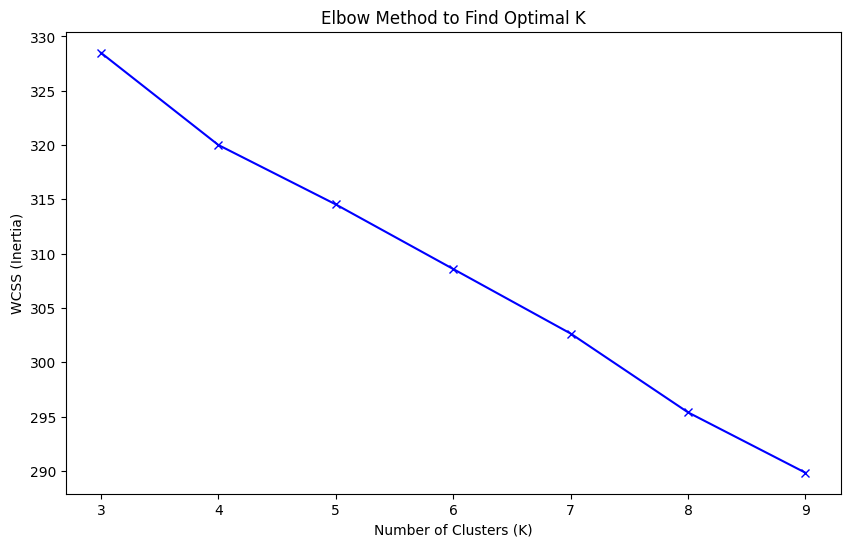

In [121]:
# Range of K values to test
K_RANGE = range(3, 10)

# --- 1. Elbow Method (WCSS: Within-Cluster Sum of Squares) ---
wcss = []
for k in K_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_) # inertia is WCSS

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_RANGE, wcss, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method to Find Optimal K')
# The "elbow" is typically the point where the line sharply bends, around K=6 or K=7.
plt.show()
# 

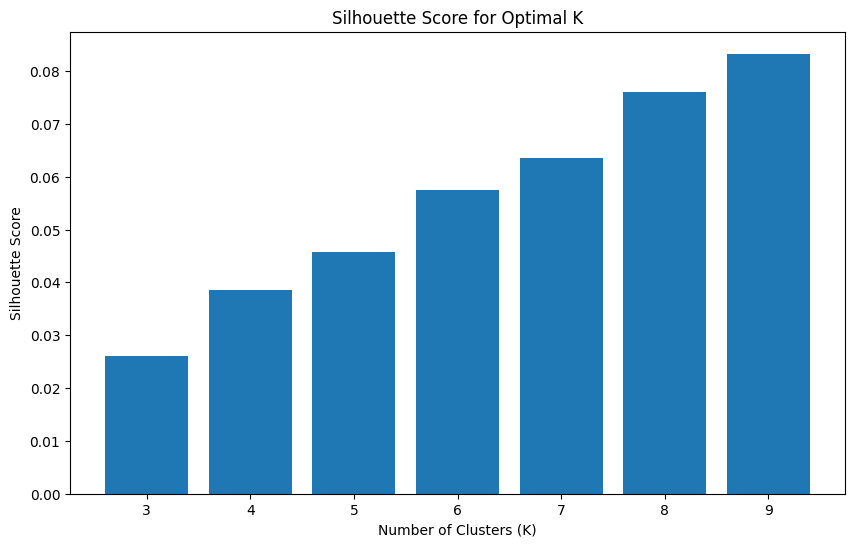

In [122]:
# --- 2. Silhouette Score ---
# Note: Silhouette Score is computationally heavy, so we limit the range slightly
silhouette_scores = {}
for k in K_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    
    # Check for only one label (which can happen with small datasets)
    if len(np.unique(cluster_labels)) > 1:
        score = silhouette_score(tfidf_matrix, cluster_labels)
        silhouette_scores[k] = score
    else:
        silhouette_scores[k] = -1.0 # Assign poor score if only one cluster found

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.bar(silhouette_scores.keys(), silhouette_scores.values())
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
# The highest score indicates better-defined clusters.
plt.show()
# 

Unfortunately, the clustering was very poor based on Shouette scores, which indicates the similarity of a data points in its own cluster compared to other clusters between -1 and 1.

Cluster distribution for K=7:
0    212
5     49
1     37
6     32
3     30
4     25
2     12
Name: count, dtype: int64


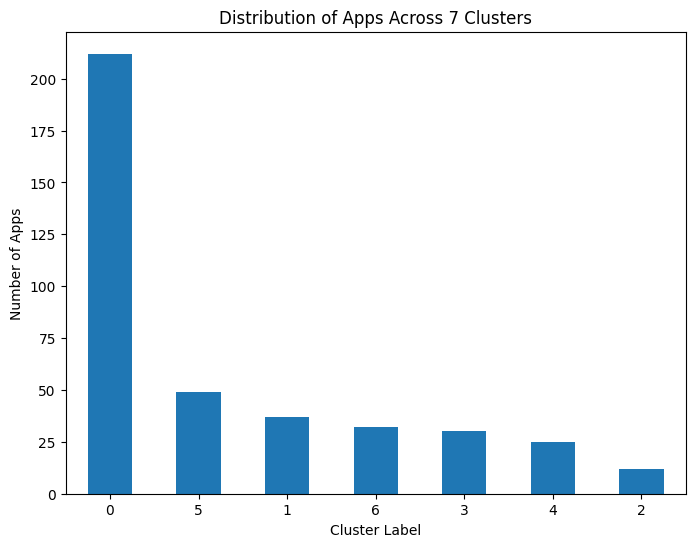

In [123]:
FINAL_K = 7
kmeans = KMeans(n_clusters=FINAL_K, random_state=42, n_init=10)
df_experiment_7 = kmeans.fit_predict(tfidf_matrix)
clustering_df['cluster_label'] = df_experiment_7
# Show the distribution of the newly created clusters
print(f"Cluster distribution for K={FINAL_K}:")
print(pd.Series(df_experiment_7).value_counts())

plt.figure(figsize=(8, 6))
pd.Series(df_experiment_7).value_counts().plot(kind='bar', rot=0)
plt.title(f'Distribution of Apps Across {FINAL_K} Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Apps')
plt.show()


In [124]:
lda = LatentDirichletAllocation(
    n_components=FINAL_K, 
    random_state=42, 
    learning_method='batch'
)
lda.fit(tfidf_matrix) # Use the same TF-IDF matrix used for K-Means

# Function to print the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-no_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        print(f"Topic {topic_idx} ({len(top_features)} words): {', '.join(top_features)}")

# Function to display example apps in a cluster (New for debugging/labeling)
def display_cluster_examples(cluster_num, n=5):
    """Prints the titles of the top N apps in a given cluster."""
    print(f"\n\n\n\n=== Top {n} Apps in Cluster {cluster_num} ===")
    cluster_df = training_df[training_df['cluster_label'] == cluster_num]
    # Sort by score or ratings to show the highest quality examples
    top_apps = cluster_df.sort_values(by='score', ascending=False).head(n)
    for index, row in top_apps.iterrows():
        print(f"------{row['title']} (Score: {row['score']:.2f})------")
        print(f"    Description: {row['description']}")
    return top_apps.copy()


# 1. Display Top Words for Interpretation
no_top_words = 16
print(f"\n--- Top {no_top_words} Words for Each of the {FINAL_K} Topics (Categories) ---")
display_topics(lda, tfidf.get_feature_names_out(), no_top_words)


# 2. Inspect Sample Apps for each cluster to finalize labels (THIS IS THE CODE YOU NEED TO RUN NEXT)
for k in range(FINAL_K):
    display_cluster_examples(k, n=5)


--- Top 16 Words for Each of the 7 Topics (Categories) ---
Topic 0 (16 words): ling, usd, quran, abc, challenge, game, using, fun, interactive, write, variety, much, teach, complete, speak, quiz
Topic 1 (16 words): everything, time, pace, image, easier, interface, reading writing, youve, listening, learned, already, language, mode, beginner, simple, anytime
Topic 2 (16 words): drop, addictive, habit, quick, fun, picture, sound, practical, make, knowledge, time, faster, play, hangul, game, build
Topic 3 (16 words): mondly, core, memorizing, become, speech recognition, clearly, put, recognition, end, screen, useful phrase, break, verb conjugation, hundred, great, conjugation
Topic 4 (16 words): child, kid, parent, abc, quran, teach, studycat, letter, duolingo, activity, engaging, age, love, ad, family, download
Topic 5 (16 words): vocabulary, lesson, pronunciation, phrase, language, grammar, speak, flashcard, game, conversation, speaking, fun, skill, improve, speaker, reading
Topic 6 (1

#### 3.1.2 HDBSCAN

***Rationale**: K-Means vs HDBSCAN

I also tried HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise), thinking this algorithm might be more suitable, since 1. it doesn't require the number of clasters to be specified beforehand, and 2. hierarchical categories could work better for app categories. However, it produced a very low stability score with most apps considerd as nosie. This shows that my TF-IDF data likely has clusters of varying densities, causing it to treat sparse regions as noise and this method is not suitable. 

In [125]:
N_COMPONENTS = 50 # Reduce embedding dimensions down to 50 for stability
pca = PCA(n_components=N_COMPONENTS, random_state=42)
SBERT_reduced_pca = pca.fit_transform(SBERT_EMBEDDINGS) 

# I run HDBSCAN to see if a density-based, automatic clustering method provides a more natural 
# and better separation than K-Means, and to verify the hypothesis about the number of clusters.
# NOTE: Using Euclidean metric (BallTree-compatible). Cosine metric is not supported by BallTree backend.
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=20, metric='euclidean', cluster_selection_method='eom', gen_min_span_tree=True)
df['hdbscan_label'] = hdbscan_clusterer.fit_predict(SBERT_reduced_pca)

# HDBSCAN assigns -1 to noise points (outliers).
num_clusters_found = len(df['hdbscan_label'].unique()) - (1 if -1 in df['hdbscan_label'].unique() else 0)
noise_points = (df['hdbscan_label'] == -1).sum()

print(f"\n--- HDBSCAN Clustering Results (S-BERT + PCA) ---")
print(f"HDBSCAN found {num_clusters_found} meaningful clusters automatically.")
print(f"Number of noise points (unclustered): {noise_points}")
print(f"HDBSCAN Stability: {hdbscan_clusterer.relative_validity_:.3f}") # Closer to 1.0 is better stability



--- HDBSCAN Clustering Results (S-BERT + PCA) ---
HDBSCAN found 0 meaningful clusters automatically.
Number of noise points (unclustered): 521
HDBSCAN Stability: 0.000


Since clustering is heavily influenced by the original data distribution, the vectorized description-based data was not very suitable for clustering.  

As an alternative, I conducted supervised learning by manually—but systematically—labeling the data (see Section 2.5: Category Assignment).

### 3.2 Supervised Learning Support Vector Machine

In [ ]:
all_category_counts = df['category'].value_counts().to_dict()
EXCLUDED_CATEGORIES = [
    'LANGUAGE_LEARNING',
    'DICTIONARY&TRANSLATION',
    'LLM',
    'NOTEBOOK'
]

# --- A. Dynamic Data Filtering ---
print("1. Preparing Data based on 'df' and 'SBERT_EMBEDDINGS'...")

# Get the value counts dynamically from your loaded DataFrame
all_category_counts = df['category'].value_counts().to_dict()

# Dynamically define the final categories list
FINAL_CATEGORIES = [
    cat for cat in all_category_counts.keys() if cat not in EXCLUDED_CATEGORIES
]

# Filter the DataFrame to create the training set based on selected categories
training_df = df[df['category'].isin(FINAL_CATEGORIES)].copy()
print(f"   Categories being trained on: {FINAL_CATEGORIES}")
print(f"   Total training documents: {len(training_df)}")
print("\n   --- Training Class Counts ---")
print(training_df['category'].value_counts().sort_values(ascending=False))
print("   -----------------------------")


1. Preparing Data based on 'df' and 'SBERT_EMBEDDINGS'...
   Categories being trained on: ['Vocabulary & Flashcard', 'Fun & Specialized Learning', 'Conversation & Fluency', 'Language Exchange', 'Comprehensive Skill Builder', 'Exam Preparation']
   Total training documents: 77

   --- Training Class Counts ---
category
Vocabulary & Flashcard         26
Fun & Specialized Learning     11
Conversation & Fluency         11
Language Exchange              11
Comprehensive Skill Builder    10
Exam Preparation                8
Name: count, dtype: int64
   -----------------------------


In [117]:
# Align embeddings (X) and labels (y)
training_indices = training_df.index.tolist()

# X is the embeddings subset for the chosen categories, aligned by index
X = SBERT_EMBEDDINGS[training_indices] 
y = training_df['category'].values


# --- B. Label Encoding ---
# Encode the categorical labels (strings) into numerical format for the model
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
encoded_categories = label_encoder.classes_

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\n2. Train/Test Split Sizes:")
print(f"   Train Features: {X_train.shape}, Test Features: {X_test.shape}")


# --- 4. OVERSAMPLING THE TRAINING DATA WITH SMOTE ---

print("\n3. Oversampling the training data using SMOTE...")
# SMOTE is used to generate SYNTHETIC samples for minority classes
smote = SMOTE(random_state=42)

# Apply SMOTE ONLY to the training data (X_train and y_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Calculate new training counts for verification
unique_labels, counts = np.unique(y_train_resampled, return_counts=True)
max_count = counts.max()
print(f"   SMOTE Complete. New Training Set Size: {len(X_train_resampled)}")
print(counts)
print(f"   Each class is now balanced to {max_count} samples.")


# --- 5. SVM TRAINING AND PROBABILITY PREDICTION ---

print("\n4. Training Support Vector Classifier (SVC) on Resampled Data...")
# SVC(probability=True) is essential for getting prediction probabilities
svm_classifier = SVC(
    kernel='linear', 
    probability=True, 
    random_state=42, 
    verbose=False
)
# Train on the resampled (balanced) data
svm_classifier.fit(X_train_resampled, y_train_resampled) 
print("   Training Complete.")

# Generate probability predictions on the original, UNTOUCHED test set
probabilities = svm_classifier.predict_proba(X_test)


2. Train/Test Split Sizes:
   Train Features: (61, 384), Test Features: (16, 384)

3. Oversampling the training data using SMOTE...
   SMOTE Complete. New Training Set Size: 120
[20 20 20 20 20 20]
   Each class is now balanced to 20 samples.

4. Training Support Vector Classifier (SVC) on Resampled Data...
   Training Complete.


Visualization (Heatmap) and Evaluation

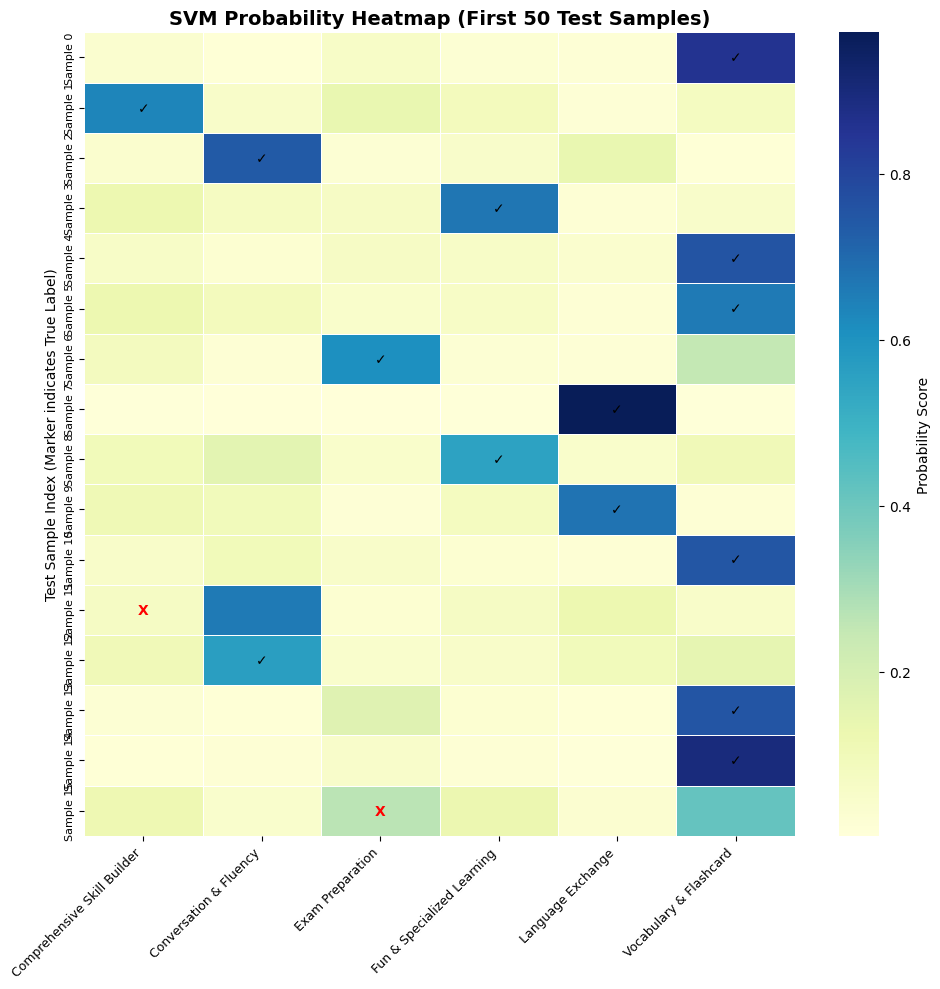

In [118]:
# Select the first 50 samples for a manageable visualization
N_SAMPLES_TO_VISUALIZE = min(50, len(X_test))

# Subset the data for visualization
visual_probabilities = probabilities[:N_SAMPLES_TO_VISUALIZE]
visual_true_labels = label_encoder.inverse_transform(y_test[:N_SAMPLES_TO_VISUALIZE])
visual_predicted_labels = label_encoder.inverse_transform(svm_classifier.predict(X_test[:N_SAMPLES_TO_VISUALIZE]))


# Create a DataFrame for the heatmap
proba_df_visual = pd.DataFrame(visual_probabilities, columns=encoded_categories)

# --- Plotting the Single Heatmap ---

# Set up a single figure and axis (simpler than the previous dual-axis plot)
fig, ax = plt.subplots(1, 1, figsize=(10, 10)) 
ax.set_title('SVM Probability Heatmap (First 50 Test Samples)', fontsize=14, fontweight='bold')


sns.heatmap(
    proba_df_visual,
    ax=ax,
    annot=False, # Use color intensity for holistic view
    fmt=".2f",
    cmap="YlGnBu", # Yellow-Green-Blue sequential colormap
    cbar_kws={'label': 'Probability Score'},
    linewidths=.5,
    linecolor='white'
)

# Rotate x-axis labels for readability
ax.set_xticklabels(proba_df_visual.columns, rotation=45, ha='right', fontsize=9)
# The Y-axis labels now include the sample index
ax.set_ylabel('Test Sample Index (Marker indicates True Label)')
ax.set_yticklabels([f'Sample {i}' for i in range(N_SAMPLES_TO_VISUALIZE)], fontsize=8)


# Mark correct/incorrect predictions with a small text annotation on the heatmap
for i in range(N_SAMPLES_TO_VISUALIZE):
    # Find the column index corresponding to the true label for this row
    true_col_index = np.where(encoded_categories == visual_true_labels[i])[0][0]
    
    # Check if prediction is correct
    is_correct = (visual_true_labels[i] == visual_predicted_labels[i])
    marker = '✓' if is_correct else 'X'
    color = 'black' if is_correct else 'red'
    
    # Place marker at the cell corresponding to the true category
    ax.text(true_col_index + 0.5, i + 0.5, marker, 
            ha='center', va='center', color=color, 
            fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# --- 4A. ROBUST CROSS-VALIDATION (CV) USING PIPELINE ---
# Create a Pipeline: SMOTE MUST only be applied to the training folds, not the test folds.
warnings.simplefilter(action='ignore', category=FutureWarning)

pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42))
])

# Use Stratified K-Fold for CV since the original data is imbalanced (even though we SMOTEd)
# The F1-Macro score is suitable for multi-class classification.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    pipeline,
    X,
    y_encoded,
    cv=cv,
    scoring="f1_macro",
    n_jobs=1
)

print(f"   CV F1-Macro Scores: {cv_scores.round(4)}")
print(f"   Mean CV F1-Macro Score: {cv_scores.mean():.4f}")

#This setup ensures that SMOTE is correctly applied only within the training folds of the cross-validation, preventing data leakage and providing a realistic performance metric.

   CV F1-Macro Scores: [0.7378 0.7545 0.7293 0.7316 0.6833]
   Mean CV F1-Macro Score: 0.7273


In [ ]:
# 8.1 Identify Remaining Apps
remaining_df = df[df['category'].isin(EXCLUDED_CATEGORIES)].copy()
remaining_indices = remaining_df.index.tolist()
X_remaining = SBERT_EMBEDDINGS[remaining_indices]

if len(remaining_df) == 0:
    print("   No remaining apps found in the EXCLUDED_CATEGORIES list to classify.")
else:
    print(f"   Found {len(remaining_df)} apps to classify from the excluded categories.")

    # 8.2 Predict Probabilities
    # Note: We must handle the case where X_remaining is empty if the filter failed
    if X_remaining.shape[0] > 0:
        remaining_probabilities = svm_classifier.predict_proba(X_remaining)

        # 8.3 Process Results
        
        # Get the index of the highest probability for each app
        top_proba_indices = np.argmax(remaining_probabilities, axis=1)
        
        # Convert index back to category name
        predicted_category = label_encoder.inverse_transform(top_proba_indices)
        
        # Get the actual probability score for the predicted category
        confidence_score = np.max(remaining_probabilities, axis=1)

        # 8.4 Create Preview DataFrame
        
        # Use the original app category (the reason it was excluded) and app text as a preview
        preview_data = {
            'Title' : remaining_df['title'].values,
            'Top Predicted Category': predicted_category,
            'Confidence Score': confidence_score,
            'App Text Preview': remaining_df['full_text'].str.slice(0, 100).values + "..." # Truncate text for readability
        }
        
        preview_df = pd.DataFrame(preview_data)

        print("\n   --- CLASSIFICATION PREVIEW (First 10 Excluded Apps) ---")
        pd.options.display.float_format = '{:,.4f}'.format
        
        # Display the preview
        print(preview_df.head(10).to_markdown(index=False))
        print("   --------------------------------------------------------")
    else:
        print("   Error: Embeddings for remaining apps could not be extracted.")

# Restore default float format
pd.options.display.float_format = None

   Found 444 apps to classify from the excluded categories.

   --- CLASSIFICATION PREVIEW (First 10 Excluded Apps) ---
| Title                          | Top Predicted Category      |   Confidence Score | App Text Preview                                                                                        |
|:-------------------------------|:----------------------------|-------------------:|:--------------------------------------------------------------------------------------------------------|
| Lingo Legend Language Learning | Fun & Specialized Learning  |           0.433151 | Lingo Legend Language Learning Learn a language while playing language learning games! Master Spanis... |
| Falou - Fast language learning | Comprehensive Skill Builder |           0.436031 | Falou - Fast language learning Want to learn a language really fast? Don't have time for tedious lan... |
| Airlearn - Language Learning   | Comprehensive Skill Builder |           0.328855 | Airlearn - Language Learni

In [ ]:
pipeline.fit(X, y_encoded)  # Fit the pipeline on the entire labeled dataset
# 1. Get Soft Assignment for ALL Apps (Labeled and Unlabeled)
# This generates the N_apps x N_classes probability matrix (375 x 7).
remaining_df = df[df['category'].isin(EXCLUDED_CATEGORIES)].copy()
remaining_indices = remaining_df.index.tolist()
X_remaining = SBERT_EMBEDDINGS[remaining_indices]
X_FULL = SBERT_EMBEDDINGS


membership_probabilities = pipeline.predict_proba(X_FULL)

# 2. Create the Final Feature Set (The 7-dimensional soft assignment vector)
prob_df = pd.DataFrame(
    membership_probabilities, 
    columns=[f'P_{category.replace(" ", "_")}' for category in label_encoder.classes_]
)

final_df = pd.concat([df.reset_index(drop=True), prob_df.reset_index(drop=True)], axis=1)
print("\n6. Final Soft Assignment Feature Created.")
print(f"Probabilistic feature set shape: {prob_df.shape}")
print("--- Sample Soft Assignment (Probabilistic Overlap) ---")
print(final_df[['title', 'category'] + [col for col in final_df.columns if col.startswith('P_')]].head(10).to_markdown())


6. Final Soft Assignment Feature Created.
Probabilistic feature set shape: (521, 6)
--- Sample Soft Assignment (Probabilistic Overlap) ---
|    | title                          | category                    |   P_Comprehensive_Skill_Builder |   P_Conversation_&_Fluency |   P_Exam_Preparation |   P_Fun_&_Specialized_Learning |   P_Language_Exchange |   P_Vocabulary_&_Flashcard |
|---:|:-------------------------------|:----------------------------|--------------------------------:|---------------------------:|---------------------:|-------------------------------:|----------------------:|---------------------------:|
|  0 | Duolingo: Language Lessons     | Fun & Specialized Learning  |                       0.0491835 |                  0.0411671 |           0.014937   |                      0.86557   |             0.0110576 |                  0.0180848 |
|  1 | Busuu: Learn & Speak Languages | Conversation & Fluency      |                       0.134964  |                  0.718788  |  

Rows that originally didn't have categories tend to have lower, more spread out probabilities than rows that had 

In [ ]:
print(label_encoder.classes_)
print(FINAL_CATEGORIES)
final_df.head()

['Comprehensive Skill Builder' 'Conversation & Fluency' 'Exam Preparation'
 'Fun & Specialized Learning' 'Language Exchange' 'Vocabulary & Flashcard']
['Vocabulary & Flashcard', 'Fun & Specialized Learning', 'Conversation & Fluency', 'Language Exchange', 'Comprehensive Skill Builder', 'Exam Preparation']


,title,description,category,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,...,max_iap_price,languages_offered,cluster_label,hdbscan_label,P_Comprehensive_Skill_Builder,P_Conversation_&_Fluency,P_Exam_Preparation,P_Fun_&_Specialized_Learning,P_Language_Exchange,P_Vocabulary_&_Flashcard
0,Duolingo: Language Lessons,Learn a new language with the world‚Äôs most-d...,Fun & Specialized Learning,Learn a new language with the world‚Äôs most-d...,"Learn Spanish, French, German, English, Math, ...","500,000,000+",500000000,798147205,4.567638,40018826.0,...,239.99,"spanish,french,german,japanese,korean,chinese,...",6,-1,0.049183,0.041167,0.014937,0.865570,0.011058,0.018085
1,Busuu: Learn & Speak Languages,Learn Spanish with language learning designed ...,Conversation & Fluency,Learn Spanish with language learning designed ...,"Learn Languages Fast - Learn Spanish, Japanese...","50,000,000+",50000000,52244753,4.659640,1054466.0,...,169.99,"spanish,french,german,japanese,korean,chinese,...",1,-1,0.134964,0.718788,0.018186,0.063880,0.039103,0.025078
2,Speak: Language Learning,Get ready to take your language skills to the ...,Conversation & Fluency,Get ready to take your language skills to the ...,"Reach fluency in Spanish, French, English, and...","5,000,000+",5000000,8902185,4.668526,98601.0,...,349.99,"spanish,french,japanese,korean,italian,english",6,-1,0.023281,0.907742,0.008223,0.018616,0.031067,0.011071
3,Lingo Legend Language Learning,Learn a language while playing language learni...,LANGUAGE_LEARNING,Learn a language while playing language learni...,"Learn a language playing a game! Spanish, Fren...","100,000+",100000,345318,4.757576,8450.0,...,149.99,"spanish,french,german,japanese,korean,chinese,...",6,-1,0.200066,0.063863,0.030336,0.514990,0.096540,0.094206
4,Falou - Fast language learning,Want to learn a language really fast? Don't ha...,LANGUAGE_LEARNING,Want to learn a language really fast? Don&#39;...,Want to learn English? Learn French or learn S...,"10,000,000+",10000000,12150516,4.726343,836163.0,...,149.99,"spanish,french,german,japanese,korean,chinese,...",1,-1,0.369823,0.150075,0.018274,0.364916,0.040522,0.056390


In [ ]:
PROBABILITY_COLUMNS = [col for col in final_df.columns if col.startswith('P_')]
ASSIGNMENT_THRESHOLD = 0.25 


def assign_multi_labels(row, prob_cols, threshold):
    """
    Assigns all categories whose probability meets or exceeds the defined threshold.
    The logic handles the hybrid case:
    - If original category is GENERIC (LANGUAGE_LEARNING), it is fully replaced by the model's prediction.
    - If original category is SPECIFIC (e.g., Exam Prep), it is kept and potentially augmented by model's *other* predictions.
    """
    
    original_category = row['category']
    assigned_labels = []
    
    # 1. PRIMARY ASSIGNMENT: Look for categories that meet the probability threshold
    for col in prob_cols:
        prob_score = row[col]
        
        if prob_score >= threshold:
            # Convert the column name (e.g., 'P_Conversation_&_Fluency') back to a readable label
            label = col.replace('P_', '').replace('_', ' ')
            assigned_labels.append(label)
            
    
    if original_category == 'LANGUAGE_LEARNING':
        if not assigned_labels:
            # If the best predicted category doesn't meet the threshold (e.g., max prob is 0.15), 
            # we default to the single max probability prediction.
            max_col = row[prob_cols].idxmax()
            label = max_col.replace('P_', '').replace('_', ' ')
            return label
        else:
            # If any probability meets the threshold, we use all of them.
            return ", ".join(assigned_labels)
    elif original_category in EXCLUDED_CATEGORIES: 
        return original_category
    else:
        # 2B. CASE: SPECIFIC LABEL (Must keep and augment)
        
        # Start with the original category, ensuring case consistency
        final_labels_set = {original_category} 
        
        # Add any newly predicted labels that meet the threshold, IF they are different from the original.
        # This prevents duplication if the model confirms the original label.
        for label in assigned_labels:
            if label != original_category:
                 final_labels_set.add(label)

        # Sort the final list for consistent output
        return ", ".join(sorted(list(final_labels_set)))


# --- 1. Execute Multi-Label Assignment ---
final_df['category_multi'] = final_df.apply(
    lambda row: assign_multi_labels(row, PROBABILITY_COLUMNS, ASSIGNMENT_THRESHOLD), 
    axis=1
)

# --- 2. Analyze Overlap and Granularity ---
# We split by ', ' to count the number of assigned categories
overlap_counts = final_df['category_multi'].apply(lambda x: len(x.split(', '))).value_counts().sort_index()

print("\n--- Multi-Label Assignment Analysis ---")
print(f"Assignment Threshold (τ) used: {ASSIGNMENT_THRESHOLD}")
print("\nDistribution of Assigned Categories per App:")
# The header is changed to 'Num. Categories'
print(overlap_counts.to_frame('Num. Categories').to_markdown())

print("\nSample Apps with Overlap (App assigned 2 or more categories):")
# Filter and display a sample of apps with high overlap (more than one category assigned)
overlap_sample = final_df[final_df['category_multi'].str.contains(',')].head(10)
overlap_sample[['title', 'description', 'category', 'category_multi']].head(20)




--- Multi-Label Assignment Analysis ---
Assignment Threshold (τ) used: 0.25

Distribution of Assigned Categories per App:
|   category_multi |   Num. Categories |
|-----------------:|------------------:|
|                1 |               434 |
|                2 |                86 |
|                3 |                 1 |

Sample Apps with Overlap (App assigned 2 or more categories):


,title,description,category,category_multi
4,Falou - Fast language learning,Want to learn a language really fast? Don't ha...,LANGUAGE_LEARNING,"Comprehensive Skill Builder, Fun & Specialized..."
5,Airlearn - Language Learning,"Airlearn: Learn Spanish, German, French, Itali...",LANGUAGE_LEARNING,"Comprehensive Skill Builder, Vocabulary & Flas..."
21,LingQ - Language Learning,Experience Language Learning with LingQ ‚Äî th...,LANGUAGE_LEARNING,"Comprehensive Skill Builder, Fun & Specialized..."
30,Simpler: English learning app,Learning English is now easier than ever! Try ...,Comprehensive Skill Builder,"Comprehensive Skill Builder, Vocabulary & Flas..."
33,Learn English. Speak English,Learn English with free lessons daily. Let Mon...,Conversation & Fluency,"Comprehensive Skill Builder, Conversation & Fl..."
59,ConjuGato: Learn Spanish Verbs,ConjuGato is your perfect Spanish language lea...,LANGUAGE_LEARNING,"Comprehensive Skill Builder, Vocabulary & Flas..."
60,Learn Spanish Grammar & Verbs,<h1><b>Learn Spanish Grammar & Conquer Verb Co...,LANGUAGE_LEARNING,"Conversation & Fluency, Vocabulary & Flashcard"
62,Learn Spanish | LingQ,Transform the way you learn Spanish.\r\n\r\n L...,LANGUAGE_LEARNING,"Fun & Specialized Learning, Vocabulary & Flash..."
63,Learn Spanish Mexican,<h2>Learn Spanish with Ling in just 10 minutes...,LANGUAGE_LEARNING,"Conversation & Fluency, Fun & Specialized Lear..."
68,Wlingua - Learn French,<b>Learning French has never been so easy.</b>...,LANGUAGE_LEARNING,"Comprehensive Skill Builder, Fun & Specialized..."


In [ ]:
# --- Saving the Final Feature Set ---
# This is the final output of the entire categorization process, ready for Notebook 02.
file_path = "language_apps_category.csv"
final_df.to_csv(file_path, index=False)
print(f"\nFinal supervised features saved to '{file_path}'.")


Final supervised features saved to 'language_apps_category.csv'.
